In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kpca import KPCA
from kernels import kernel

file = pd.read_csv('Social_Network_Ads.csv')
#we are including the two index from our dataset and finding the corelation between them.

X = file.iloc[:,[2,3]].values
y= file.iloc[:,4].values

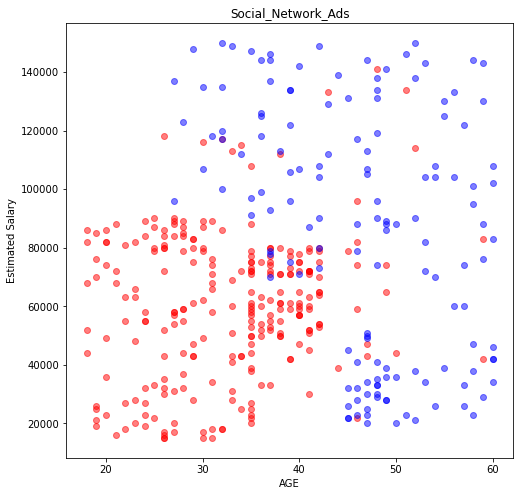

In [2]:
plt.figure(figsize=(8,8))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Social_Network_Ads')
plt.ylabel('Estimated Salary')
plt.xlabel('AGE')
plt.show()

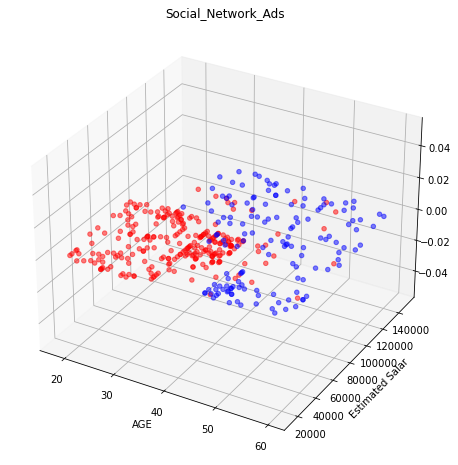

In [3]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:,0],X[:,1],y)
ax.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
ax.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Social_Network_Ads')
plt.ylabel('Estimated Salar')
plt.xlabel('AGE')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=20)

In [5]:
#we need to do the feature scaling to get the accurate prediction.

from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()

X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)


In [6]:
'''We have to apply KernelPCA just before applying LogisticRegression to the give Dataset.'''
#Applying KernelPCA
from sklearn.decomposition import KernelPCA

'''we have to define the no. of Principal Components for most variance. 
And check which components explain the most variance in the given dataset.
We want 2 independent variables but for now to check which are best. We will enter None.
And later replace it with the no. of top components'''


kpca = KernelPCA(n_components=2, kernel = 'rbf' )
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

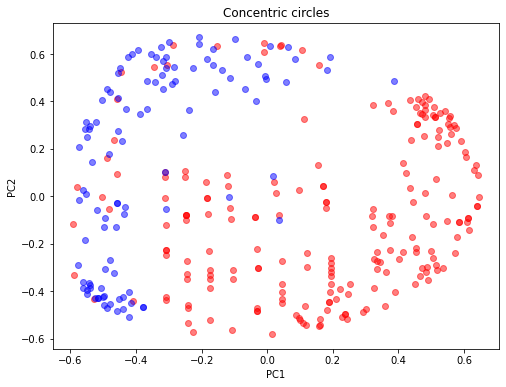

In [7]:
plt.figure(figsize=(8,6))

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='red', alpha=0.5)
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

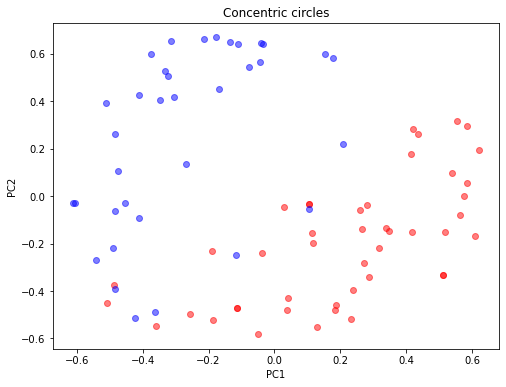

In [8]:
plt.figure(figsize=(8,6))

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color='red', alpha=0.5)
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



The Confusion Matrix for our KernelPCA Logistic Regression is:

[[43  2]
 [ 7 28]]


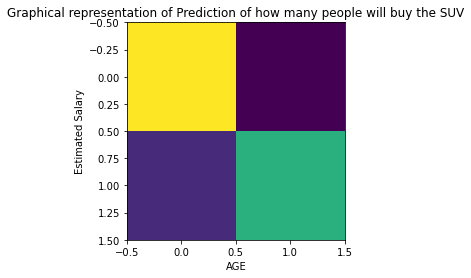

In [10]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)
print('\n\nThe Confusion Matrix for our KernelPCA Logistic Regression is:\n')
print(conf_matrix)
 
plt.imshow(conf_matrix)
plt.title('Graphical representation of Prediction of how many people will buy the SUV')
plt.xlabel('AGE')
plt.ylabel('Estimated Salary')
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


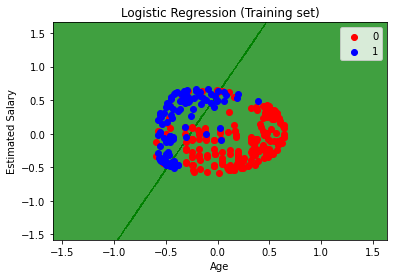

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


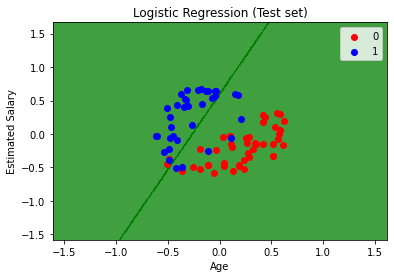




 Hence the accuracy of the Kernelized PCA for Logistic Regression is: 0.8875


 Done :)


In [12]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print('\n\n\n Hence the accuracy of the Kernelized PCA for Logistic Regression is:',accuracy)
print('\n\n Done :)')
